In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-reviews/data_embedded.csv


In [4]:
df = pd.read_csv('/kaggle/input/book-reviews/data_embedded.csv')
df.head()

,Unnamed: 0,Id,categories,published_date,user_id,useful,total_of_person,review_score,tokens,embedding_word
0,1,0826414346,['Biography & Autobiography'],2005-01-01,A30TK6U7DNS82R,10,10,5.0,"['dont', 'care', 'much', 'dr', 'seuss', 'readi...",[ 0.19285151 0.04566829 0.87209934 0.998347...
1,2,0826414346,['Biography & Autobiography'],2005-01-01,A3UH4UZ4RSVO82,10,11,5.0,"['people', 'become', 'book', 'read', 'child', ...",[ 0.63170236 -0.3734727 1.0102506 1.224012...
2,3,0826414346,['Biography & Autobiography'],2005-01-01,A2MVUWT453QH61,7,7,4.0,"['theodore', 'seuss', 'geisel', 'aka', 'quotdr...",[ 0.3843168 -0.13113278 0.5682461 0.749878...
3,4,0826414346,['Biography & Autobiography'],2005-01-01,A22X4XUPKF66MR,3,3,4.0,"['philip', 'nel', 'dr', 'seuss', 'american', '...",[ 0.12973899 -0.03000592 1.0274833 1.579559...
4,5,0826414346,['Biography & Autobiography'],2005-01-01,A2F6NONFUDB6UK,2,2,4.0,"['dr', 'seuss', 'american', 'icon', 'philip', ...",[ 0.716405 0.27937806 1.0383431 1.055518...


In [5]:
def convert_to_array(x):
    if isinstance(x, str):
        # Remove newline characters and extra spaces
        cleaned_str = x.replace('\n', ' ')
        return np.fromstring(cleaned_str.strip("[]"), sep=' ')
    elif isinstance(x, (list, np.ndarray)):
        return np.array(x)
    else:
        return np.array([])  # Return an empty array for invalid entries

In [6]:
token_array = df['embedding_word'].apply(convert_to_array)
token_array

0          [0.19285151, 0.04566829, 0.87209934, 0.9983476...
1          [0.63170236, -0.3734727, 1.0102506, 1.224012, ...
2          [0.3843168, -0.13113278, 0.5682461, 0.74987835...
3          [0.12973899, -0.03000592, 1.0274833, 1.5795593...
4          [0.716405, 0.27937806, 1.0383431, 1.0555185, -...
                                 ...                        
1402738    [-0.34217352, 0.32921565, 0.8487992, 1.550168,...
1402739    [0.2674665, -1.0181471, 1.0845222, 1.1985999, ...
1402740    [0.08489513, -0.50746673, 0.5852293, 1.2786855...
1402741    [0.6421542, -1.141805, 0.9272112, 1.5011332, -...
1402742    [0.44831201, -1.5996432, 0.085948303, 1.385344...
Name: embedding_word, Length: 1402743, dtype: object

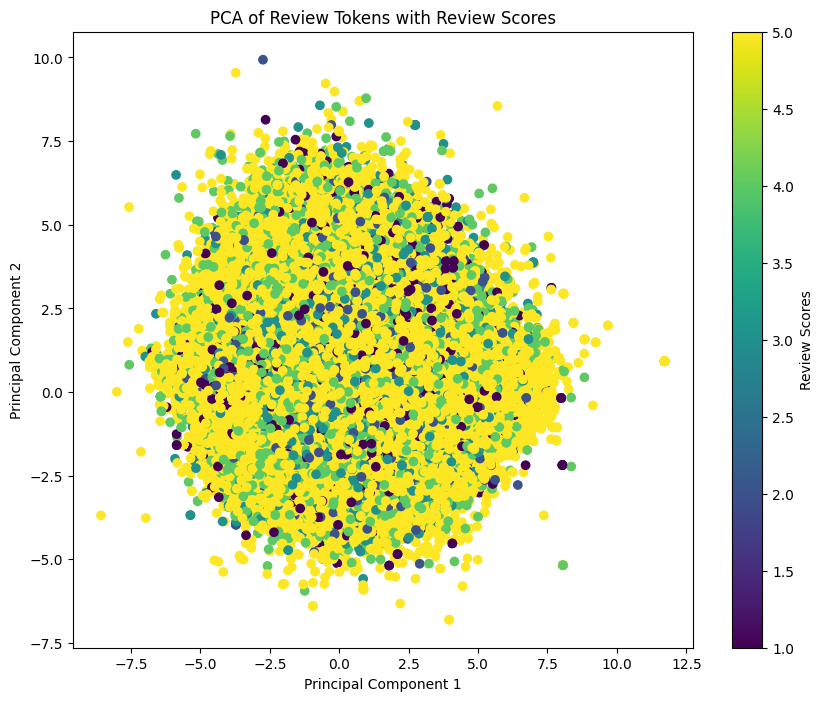

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(token_array.tolist())

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df['review_score'], cmap='viridis')
plt.colorbar(scatter, label='Review Scores')
plt.title('PCA of Review Tokens with Review Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()